In [11]:
import numpy as np
import pandas as pd 
import os


In [12]:
tweets = pd.read_csv('Tweets.csv')

In [13]:
tweets.shape

(14640, 15)

In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


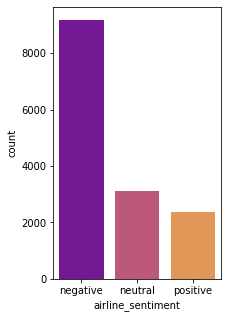

In [7]:
plt.figure(figsize=(3,5))
sns.countplot(tweets['airline_sentiment'], order =tweets.airline_sentiment.value_counts().index,palette= 'plasma')
plt.show()

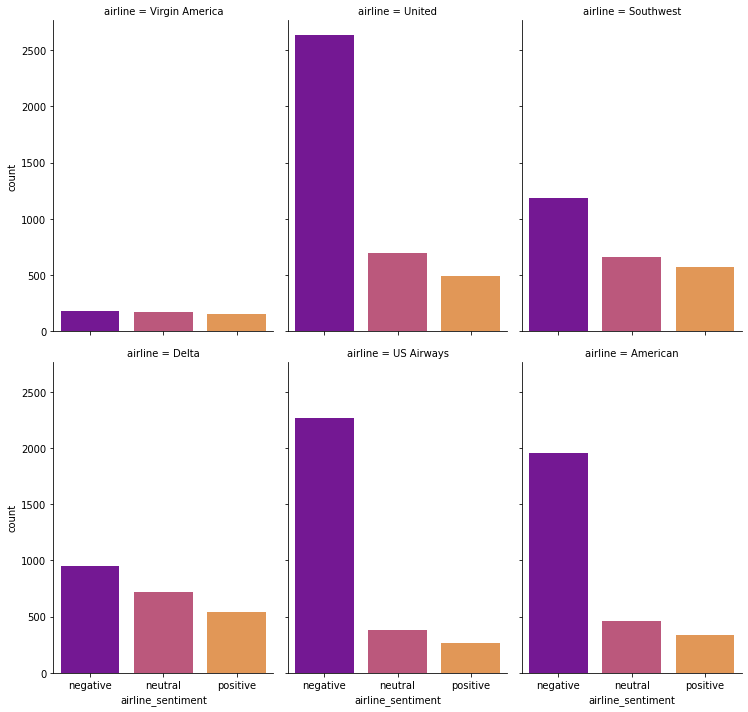

In [8]:
g = sns.FacetGrid(tweets, col="airline", col_wrap=3, height=5, aspect =0.7)
g = g.map(sns.countplot, "airline_sentiment",order =tweets.airline_sentiment.value_counts().index, palette='plasma')
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline
from warnings import filterwarnings
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline

In [20]:
twitter_sentiment = Pipeline([('CVec', CountVectorizer(stop_words='english')),
                     ('Tfidf', TfidfTransformer()),
                      ('norm', Normalizer()),
                    ('tSVD', TruncatedSVD(n_components=100)),
                     ('lgb', LGBMClassifier(n_jobs=-1))])

In [21]:
cv_pred = cross_validate(twitter_sentiment, 
                             tweets['text'], 
                             tweets['airline_sentiment'], 
                             cv=5,
                             scoring=('roc_auc_ovr'))

In [22]:
sorted(cv_pred.keys())

['fit_time', 'score_time', 'test_score']

In [23]:
cv_pred['test_score']

array([0.82286794, 0.83538768, 0.76663513, 0.84496431, 0.7944955 ])